# Extract Key-Value pairs from Medical Report Image

Below is an example of using AnyParser to accurately extract values from a sample medical report into key-value pairs.

### 1. Load the libraries

To install the packages, uncomment the commands below.

In [1]:
# !pip3 install python-dotenv
# !pip3 install pillow
# !pip3 install --upgrade any-parser

Next, to use AnyParser, either install the public package or clone the SDK locally.

In [2]:
# Option 1: install public package
# !pip3 install --upgrade any-parser

# Option 2: if you have sdk respository installed locally, add system path
# import sys
# sys.path.append(".")
# sys.path.append("..")
# sys.path.append("../..")

After performing Option 1 or 2 above, import the libraries.

In [3]:
import os
from dotenv import load_dotenv
from PIL import Image
from IPython.display import display
from any_parser import AnyParser

### 2. Set up your AnyParser API key

To set up your `CAMBIO_API_KEY` API key, you will:

1. create a `.env` file in your root folder;
2. add the following one line to your `.env file:
    ```
    CAMBIO_API_KEY=17b************************
    ```

Then run the below line to load your API key.

In [4]:
load_dotenv(override=True)
example_apikey = os.getenv("CAMBIO_API_KEY")

### 3. Load the test sample data

Now let's load a sample data to test AnyParser's capabilities. AnyParser supports both image and PDF. 

Let's visualize the sample image first!

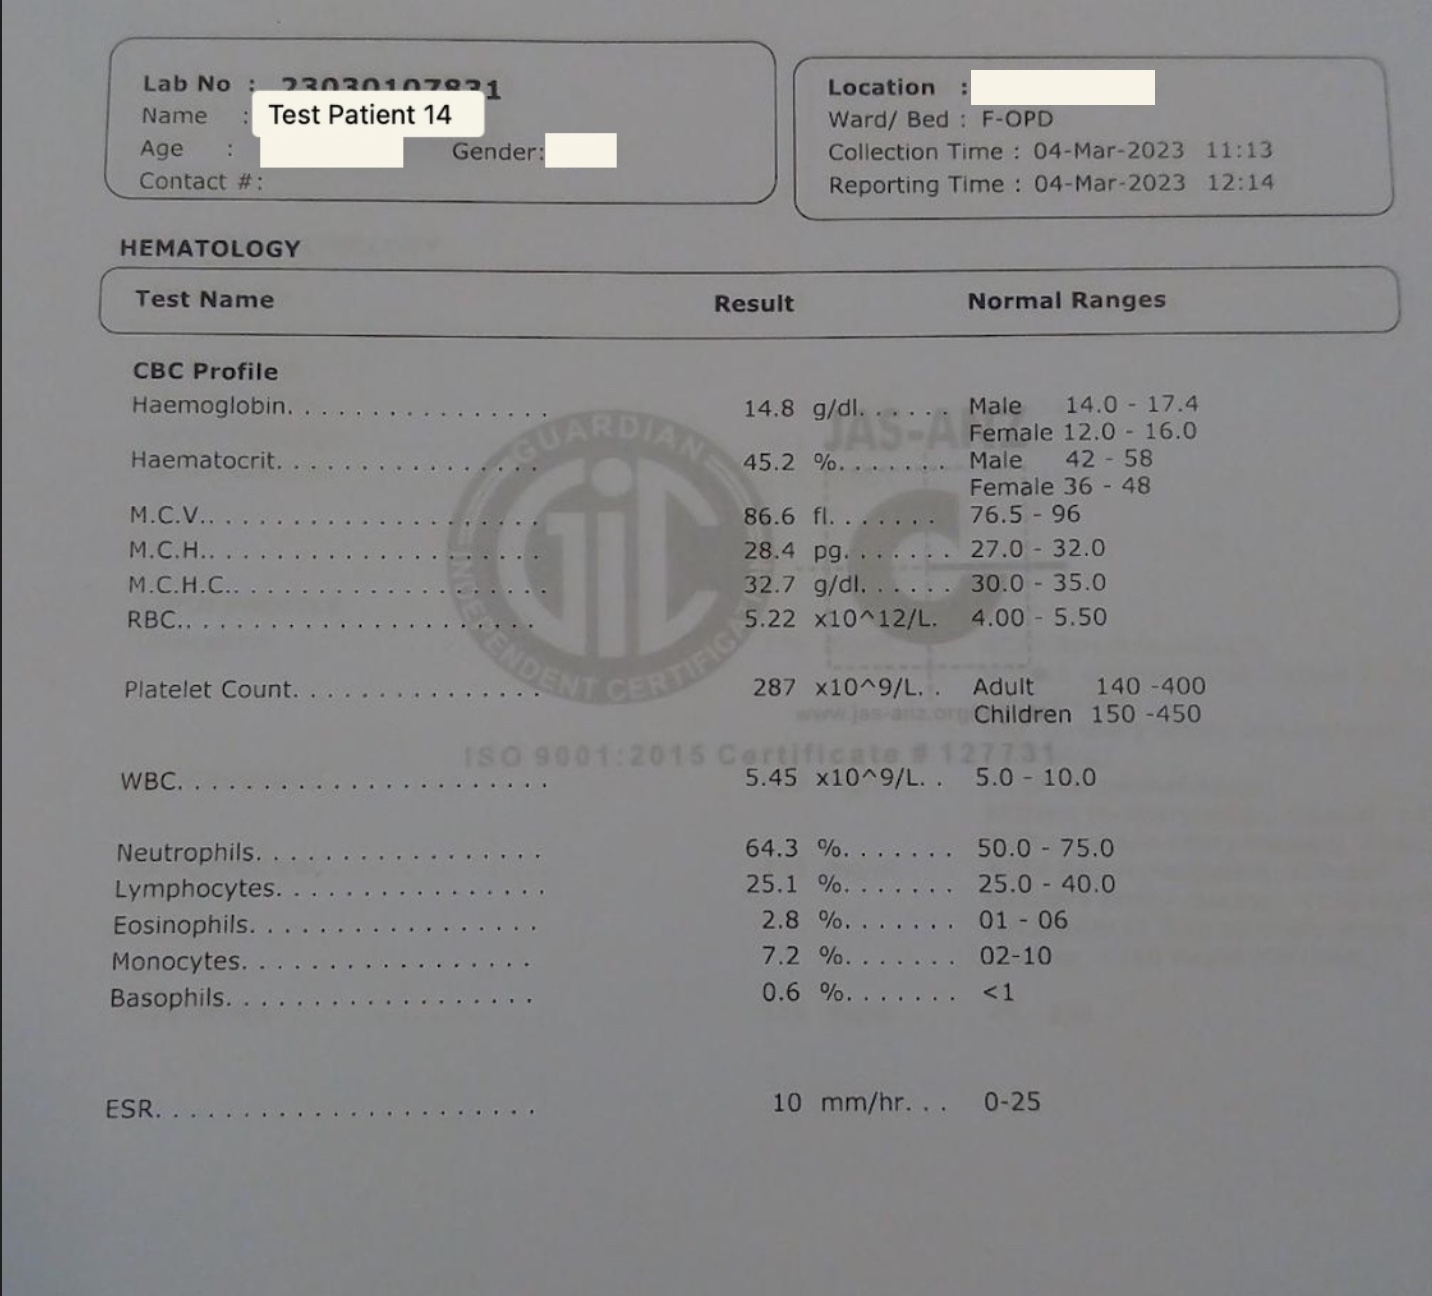

In [5]:
example_local_file = "./sample_data/test_medical_report.jpeg"

# Open the image file
image = Image.open(example_local_file)

# Display the image
display(image)

### 4. Run AnyParser and Extract the Key Value pairs

We will run AnyParser on our sample data and then extract the key value pairs. 

We need to specify 2 parameters for the `async_upload`:
- `file_path`: The path to the PDF file.
- `extract_instruction`: This is a dictionary of the form `{"key": "key description"}` where the key is the name of the key to extract and the key description is a description of that key.

For the `async_fetch`, we need need to specify the following parameters:
- `file_id`: The file ID returned from the `async_upload` function.
- `sync_timeout`: The time in seconds to wait for the extraction to complete.
- `sync_interval`: The time in seconds to wait between each check for the extraction status.

The extract may take 1-20 seconds per page. Note that this example uses the Synchronous API. To see how AnyParser can be used asynchronously, see the [Synchronous API notebook](./image_to_key_value.ipynb).

In [6]:
ap = AnyParser(example_apikey)

extract_instruction = {
                "R.B.C.": "Red Blood Cells",
                "M.C.V.": "Mean Corpuscular Volume",
                "M.C.H.": "Mean Corpuscular Hemoglobin",
                "M.C.H.C.": "Mean Corpuscular Hemoglobin Concentration",
            }

# extract returns a tuple containing the markdown as a string and total time
file_id = ap.async_extract_key_value(example_local_file, extract_instruction)

# fetch results (5s polling up to 60s)
result = ap.async_fetch(file_id, sync=True, sync_timeout=60, sync_interval=5)
display(result)

Waiting for response...
Waiting for response...
Waiting for response...
Waiting for response...


[{'R.B.C.': ['5.22 x10^12/L'],
  'M.C.V.': ['86.6 fl'],
  'M.C.H.': ['28.4 pg'],
  'M.C.H.C.': ['32.7 g/dl']}]

## End of the notebook

Check more [case studies](https://www.cambioml.com/blog) of CambioML!

<a href="https://www.cambioml.com/" title="Title">
    <img src="./sample_data/cambioml_logo_large.png" style="height: 100px; display: block; margin-left: auto; margin-right: auto;"/>
</a>